In [4]:
from requests import get
url_s1 = 'https://www.imdb.com/title/tt0206512/episodes?season=1'
url_s2 = 'https://www.imdb.com/title/tt0206512/episodes?season=2'
url_s3 = 'https://www.imdb.com/title/tt0206512/episodes?season=3'
url_s4 = 'https://www.imdb.com/title/tt0206512/episodes?season=4'
url_s5 = 'https://www.imdb.com/title/tt0206512/episodes?season=5'
url_s6 = 'https://www.imdb.com/title/tt0206512/episodes?season=6'
url_s7 = 'https://www.imdb.com/title/tt0206512/episodes?season=7'
url_s8 = 'https://www.imdb.com/title/tt0206512/episodes?season=8'
url_s9 = 'https://www.imdb.com/title/tt0206512/episodes?season=9'
url_s10 = 'https://www.imdb.com/title/tt0206512/episodes?season=10'
url_s11 = 'https://www.imdb.com/title/tt0206512/episodes?season=11'
url_s12 = 'https://www.imdb.com/title/tt0206512/episodes?season=12'
url_s13 = 'https://www.imdb.com/title/tt0206512/episodes?season=13'

urls = [url_s1,url_s2,url_s3,url_s4,url_s5,url_s6,url_s7,url_s8,url_s9,url_s10 ,url_s11 ,url_s12 ,url_s13]


In [7]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np


In [23]:
episode_ratings = {}
for url in urls:
  response = get(url)
  html_soup = BeautifulSoup(response.text, 'html.parser')
  episode_containers = html_soup.find_all('div', class_='info')
  for episode in episode_containers:
    if episode.find('span', class_='ipl-rating-star__rating') != None:
      episode_ratings[episode.a['title']] = float(episode.find('span', class_='ipl-rating-star__rating').text)
    else:
      print(episode.a['title'])
episode_ratings

Knock Knock, Who's There?/Pat Hearts Squid
Plankton's Intern/Patrick's Tantrum
Bubble Bass's Tab/Kooky Cooks
Squidward's Sick Daze/Under the Small Top
Episode #13.3
The Perfect Story


{'20,000 Patties Under the Sea/The Battle of Bikini Bottom': 7.1,
 'A Cabin in the Kelp/The Hankering': 7.1,
 'A Day Without Tears/Summer Job': 5.3,
 'A Flea in Her Dome/The Donut of Shame/The Krusty Plate': 7.1,
 'A Friendly Game/Sentimental Sponge': 6.8,
 'A Life in a Day/Sun Bleached': 6.9,
 'A Place for Pets/Lockdown for Love': 7.7,
 'Accidents Will Happen/The Other Patty': 7.1,
 'All That Glitters/Wishing You Well': 7.3,
 "Appointment TV/Karen's Virus": 8.0,
 'Are You Happy Now?/Planet of the Jellyfish': 6.6,
 'Arrgh!/Rock Bottom': 9.3,
 'As Seen on TV/Can You Spare a Dime?': 8.9,
 'Atlantis SquarePantis': 5.8,
 'Back to the Past/The Bad Guy Club for Villains': 7.5,
 'Banned in Bikini Bottom/Stanley S. SquarePants': 6.8,
 'Barnacle Face/Pet Sitter Pat': 5.1,
 'Best Day Ever/The Gift of Gum': 6.9,
 'Big Pink Loser/Bubble Buddy': 8.9,
 'Big Sister Sam/Perfect Chemistry': 6.1,
 'Blackened Sponge/Mermaidman vs. SpongeBob': 7.3,
 'Boating Buddies/The Krabby Kronicle': 6.1,
 'Born Again

In [34]:
e_r  = {}
for e in episode_ratings:
  for ep in e.split('/'):
    e_r[ep] = episode_ratings[e]


episodes_ratings = pd.DataFrame(e_r.items(), columns = ['Episode','Rating'])
episodes_ratings

,Episode,Rating
0,Help Wanted,8.7
1,Reef Blower,8.7
2,Tea at the Treedome,8.7
3,BubbleStand,8.6
4,Ripped Pants,8.6
...,...,...
500,Escape from Beneath Glove World,7.7
501,Krusty Koncessionaires,8.3
502,Dream Hoppers,8.3
503,A Place for Pets,7.7


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc7df7ca790>]],
      dtype=object)

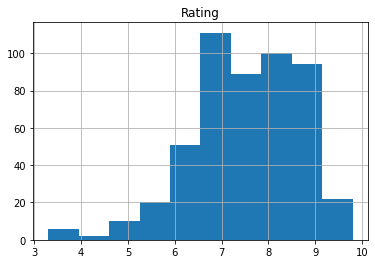

In [36]:
episodes_ratings.hist('Rating')

In [41]:
np.mean(episodes_ratings.loc[:,'Rating'])

7.50257425742574

In [42]:
np.median(episodes_ratings.loc[:,'Rating'])

7.6

In [50]:
bin_ep_rate = pd.DataFrame({'Episode': episodes_ratings['Episode'],'Rating':(episodes_ratings['Rating']>7.6).astype(int)})

In [51]:
bin_ep_rate

,Episode,Rating
0,Help Wanted,1
1,Reef Blower,1
2,Tea at the Treedome,1
3,BubbleStand,1
4,Ripped Pants,1
...,...,...
500,Escape from Beneath Glove World,1
501,Krusty Koncessionaires,1
502,Dream Hoppers,1
503,A Place for Pets,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc7e034c950>]],
      dtype=object)

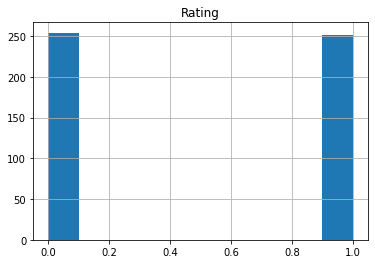

In [52]:
bin_ep_rate.hist('Rating')

In [53]:
bin_ep_rate.to_csv('/content/drive/MyDrive/w266 Final Project Resources/binary_ratings.csv')